Обсудили обновление или добавление колонок в таблице (`DataFrame` из `pandas`) используя `pd.to_datetime()`, `pd.apply()` и собственноручные функции.

- `pd.apply()` похоже на питоновский `map`.
  Дают название &mdash; применяет функцию к каждому элементу столбца.
- `lambda` &mdash; способ для записи одноразовых и простых функций. 
  **Совет:** если не уверены, то лучше не пользуйтесь, используйте обычные функции с `def` и передавайте их в `apply`

## Хитрый линейный график и условие задачи

Мы разобрали хитрый линейный график из тренировочного варианта 2, задания 2.

Условие было такое:

> На графике ниже приведена месячная производственная динамика трёх компаний. Предположим, что время является дискретной величиной. Выберите верные утверждения.

Возможные ответы такие (можно было выбрать несколько):

   
> В восьмой месяц компания 3 производила больше, чем компания 2

> Компания 1 произвела наибольшее количество продукции среди других компаний в месяц 3

> В какой-то момент времени все три компании производили одинаковое количество продукции

> Компания 2 производила стабильно меньше, чем компания 1

Первый ответ верен, достаточно нарисовать вертикальную линию из восьмого месяца вверх и увидеть, что на зелёной линии, в компании 3, значение больше, эта линия выше.

Второй и четвёртый неверны.

Верен ли третий?
    Важна строчка из условия!

> **Предположим, что время является дискретной величиной.**

Это говорит нам, что измерения это вообще-то точки, и для каждой компании точек столько, сколько месяцев, всего 9.
    В каждом месяце нам известно, сколько произведено за предыдущий.
    Эти точки для каждой компании отдельно были соединены линиями, отсюда наш график.
    
И хотя между 6 и 7 месяцами вроде бы есть момент, когда линия пересекаются в одной точке, для нас его не существует, потому что мы не измеряли, что посреди месяца происходит.
    Пересечение это артефакт графика, того как мы рисуем.
    Момента, когда произвели одинаково в месяце могло не быть (что если одна компания произвела всю норму в начале, вторая равномерно в течение месяца, а третья в конце месяца?)
    
Так или иначе, ответ 3 не подходит!
    
    
✔ **Ответ 1.**
    

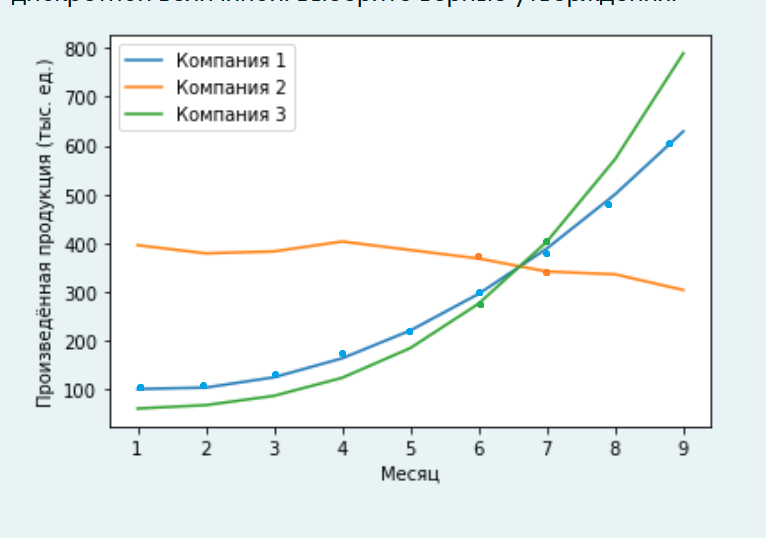

## Расчёты в numpy

Посчитали с помощью
    `numpy` ([тетрадка 01](https://github.com/tbkazakova/DataAnalysis_2023/blob/main/datan/230404_numpy_pandas.ipynb))
**стандартное отклонение** поэтапно:

Стандартное отклонение: $\sqrt{ \frac{\Sigma{ (\bar{x} - x_i)^2  }}{ n } }$ (средняя сумма *квадратов* отклонений от среднего $\bar{x}$, и из неё взять квадратный корень)

$\text{deviation} = (\bar{x} - x_i)^2 $ (квадраты отклонений, массив)  
$\text{avg_dev} =  \frac{\Sigma{ (\bar{x} - x_i)^2  }}{ n }$ (средний квадрат отклонений / среднеквадратичное отклонение, одно число).  



In [7]:
import numpy as np

# длины клювов пингвинов в мм, по лекции 
bills = np.array([52.8, 45.1, 36.2, 43.8, 39.3, 46.2, 34.5, 41.4, 33.5, 45.8])
avg = bills.mean()  # средняя длина

deviation = (bills - avg) ** 2  # квадраты отклонений
print(deviation, end="\n\n")

# среднеквадратичное отклонение (на лекции вроде не называли как-то отдельно)
avg_dev = deviation.mean()  # deviation.sum() / len(deviation)   
print(avg_dev)

# наконец, итог, стандартное отклонение
print(np.sqrt(avg_dev))



[119.6836  10.4976  32.0356   3.7636   6.5536  18.8356  54.1696   0.2116
  69.8896  15.5236]

33.11639999999999
5.754685047854486


То же самое вышло бы, если считать средний модуль отклонений, а не корень среднего квадрата отклонений?

✔ Нет, не то же самое!

Средний модуль: $\frac{\Sigma{ |\bar{x} - x_i|  }}{ n } $ (средняя сумма *квадратов* отклонений от среднего, и из неё взять квадратный корень)

И число будет другое


In [9]:
abs_dev = np.abs(bills - avg)

print(abs_dev.mean())

4.88


- пример, когда совпадают среднее и медиана

In [10]:
nums = np.array([1, 3, 5, 8, 8])

In [14]:
# среднее
nums.mean()

5.0

In [15]:
# медиана

np.quantile(nums, 0.5)

5.0